# 회귀 실습 - 자전거 대여 수요 예측

- Kaggle Bike Sharing Demand 예측 경연 대회
- https://www.kaggle.com/c/bike-sharing-demand/data
- 2011.01~2012.12 날짜/시간(1시간 간격), 기온 습도, 풍속, 자전거 대여 횟수

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### 데이터 탐색

In [136]:
bike_df = pd.read_csv('./Datasets/bike_train.csv')
bike_df.shape

(10886, 12)

In [137]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [138]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 데이터 클렌징 및 가공

**datetime 컬럼을 datetime 타입으로 변경하고 년,월,일,시 컬럼으로 추출**

In [139]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [140]:
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [141]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

**피처 삭제**
- 상관성이 있는 컬럼들 삭제 : 'datetime','casual','registered'

In [142]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


**회귀모델 성능평가 함수 작성**

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}, MSE: {3:.3f}'.format(rmsle_val, rmse_val, mae, mse))

### (1) 피처 클렌징 후 선형회귀 모델 학습/예측/평가

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = bike_df['count']
X = bike_df.drop('count', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924, MSE: 19852.694


In [122]:
bike_df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

**실제 대여횟수와 예측 대여횟수 비교**

In [147]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns=['Actual_count'])
    result_df['Predicted_count'] = np.round(pred, 1)
    result_df['Diff'] = result_df['Actual_count']-result_df['Predicted_count']
    result_df.sort_values('Diff', ascending=False)[:n_tops]

In [148]:
get_top_error_data(y_test, pred)

### (2) 타깃 변수 로그 변환 후 모델 학습/예측/평가

<AxesSubplot:>

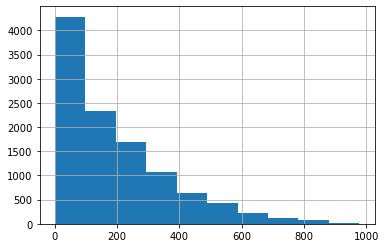

In [149]:
y.hist()

**타깃변수 로그변환**

<AxesSubplot:>

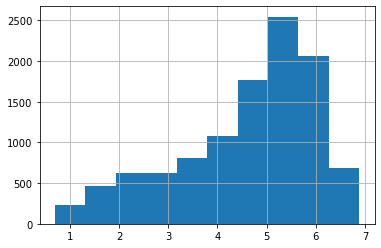

In [150]:
y_log = np.log1p(y)
y_log.hist()

**타깃 변수 로그변환 후 선형회귀 모델 학습/예측/평가(2)**

In [151]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y = np.log1p(y)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286, MSE: 26436.896


**회귀계수 시각화**

<AxesSubplot:>

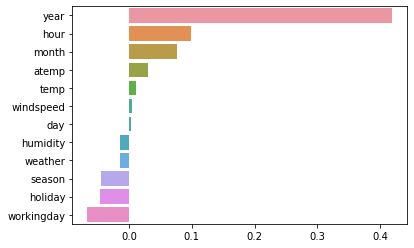

In [152]:
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

### (3) 피처 인코딩 후 모델 학습/예측/평가

**'year', month', 'day', hour' 피처 원-핫 인코딩**

In [153]:
X_ohe = pd.get_dummies(X, columns=['year', 'month', 'day', 'hour', 'holiday', 
                                   'workingday', 'season', 'weather'])

In [154]:
X_ohe.shape

(10886, 73)

**원-핫 인코딩 적용된 피처 데이터 기반으로 학습/예측/평가**

In [155]:
# 학습/예측 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, random_state=0,
                                                   test_size=0.3)
lr_reg = LinearRegression()

In [156]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('### ', model.__class__.__name__, ' ###')
    evaluate_regr(y_test, pred)

In [157]:
from sklearn.linear_model import Ridge, Lasso

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

###  LinearRegression  ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382, MSE: 9542.885
###  Ridge  ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893, MSE: 9707.883
###  Lasso  ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803, MSE: 12818.499


**회귀계수 시각화**

<AxesSubplot:>

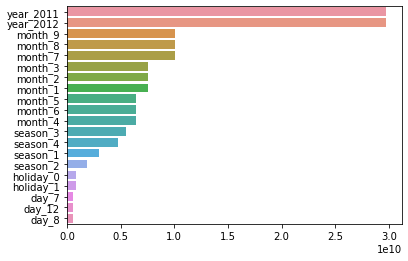

In [159]:
coef = np.abs(pd.Series(lr_reg.coef_, index=X_ohe.columns))
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

### 회귀트리를 이용한 예측

In [134]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능
    # ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, 
                      y_test.values, is_expm1=True)

###  RandomForestRegressor  ###
RMSLE: 0.355, RMSE: 50.277, MAE: 31.160, MSE: 2527.823
###  GradientBoostingRegressor  ###
RMSLE: 0.330, RMSE: 53.318, MAE: 32.729, MSE: 2842.758
###  XGBRegressor  ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251, MSE: 2676.157
###  LGBMRegressor  ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029, MSE: 2229.223
